In [2]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [1]:
westFile = "./data/results_westPositionVsTime_EndGame_New.root"
eastFile = "./data/results_eastPositionVsTime_EndGame_New.root"

In [36]:
#f = r.TFile("./data/results_positionsVsTimeVsEnergy_finerBinning_9day.root")
#f = r.TFile("./data/results_positionsVsTimeVsEnergy_finerBinning_ReconEast_9day.root")
f = r.TFile(eastFile) #recon east
fw = r.TFile(westFile) #recon west
f.cd("farline/calo2")
#f.ls()

xHistName = "xHitPositionsVsTimeVsEnergy"
yHistName = "yHitPositionsVsTimeVsEnergy"

In [37]:
calo = 2
hx = fw.Get("farline").Get("calo"+str(calo)).Get(xHistName).Clone("hx_"+str(calo))
hy = fw.Get("farline").Get("calo"+str(calo)).Get(yHistName).Clone("hy_"+str(calo))
hy.GetYaxis().SetTitle("y-position [xtals]")

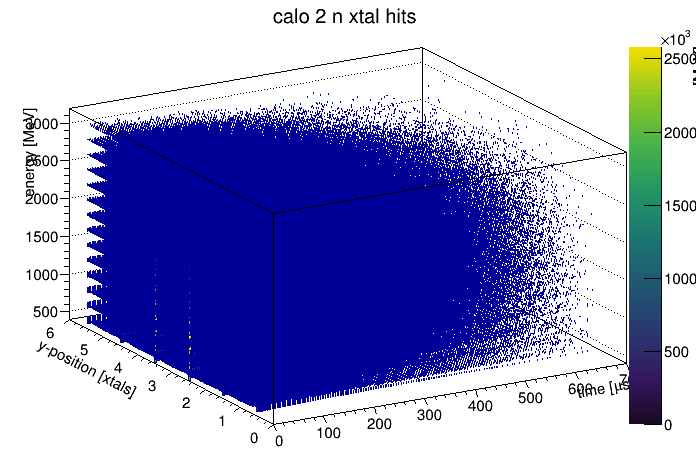

In [38]:
c = r.TCanvas()
hy.Draw("lego2z")
c.Draw()

---

In [32]:
eLow = 2800 # MeV
eHigh = 3200

tLow = 20 #microseconds
tHigh = 60

Starting calo 1
Starting calo 2
Starting calo 3
Starting calo 4
Starting calo 5
Starting calo 6
Starting calo 7
Starting calo 8
Starting calo 9
Starting calo 10
Starting calo 11
Starting calo 12
Starting calo 13
Starting calo 14
Starting calo 15
Starting calo 16
Starting calo 17
Starting calo 18
Starting calo 19
Starting calo 20
Starting calo 21
Starting calo 22
Starting calo 23
Starting calo 24


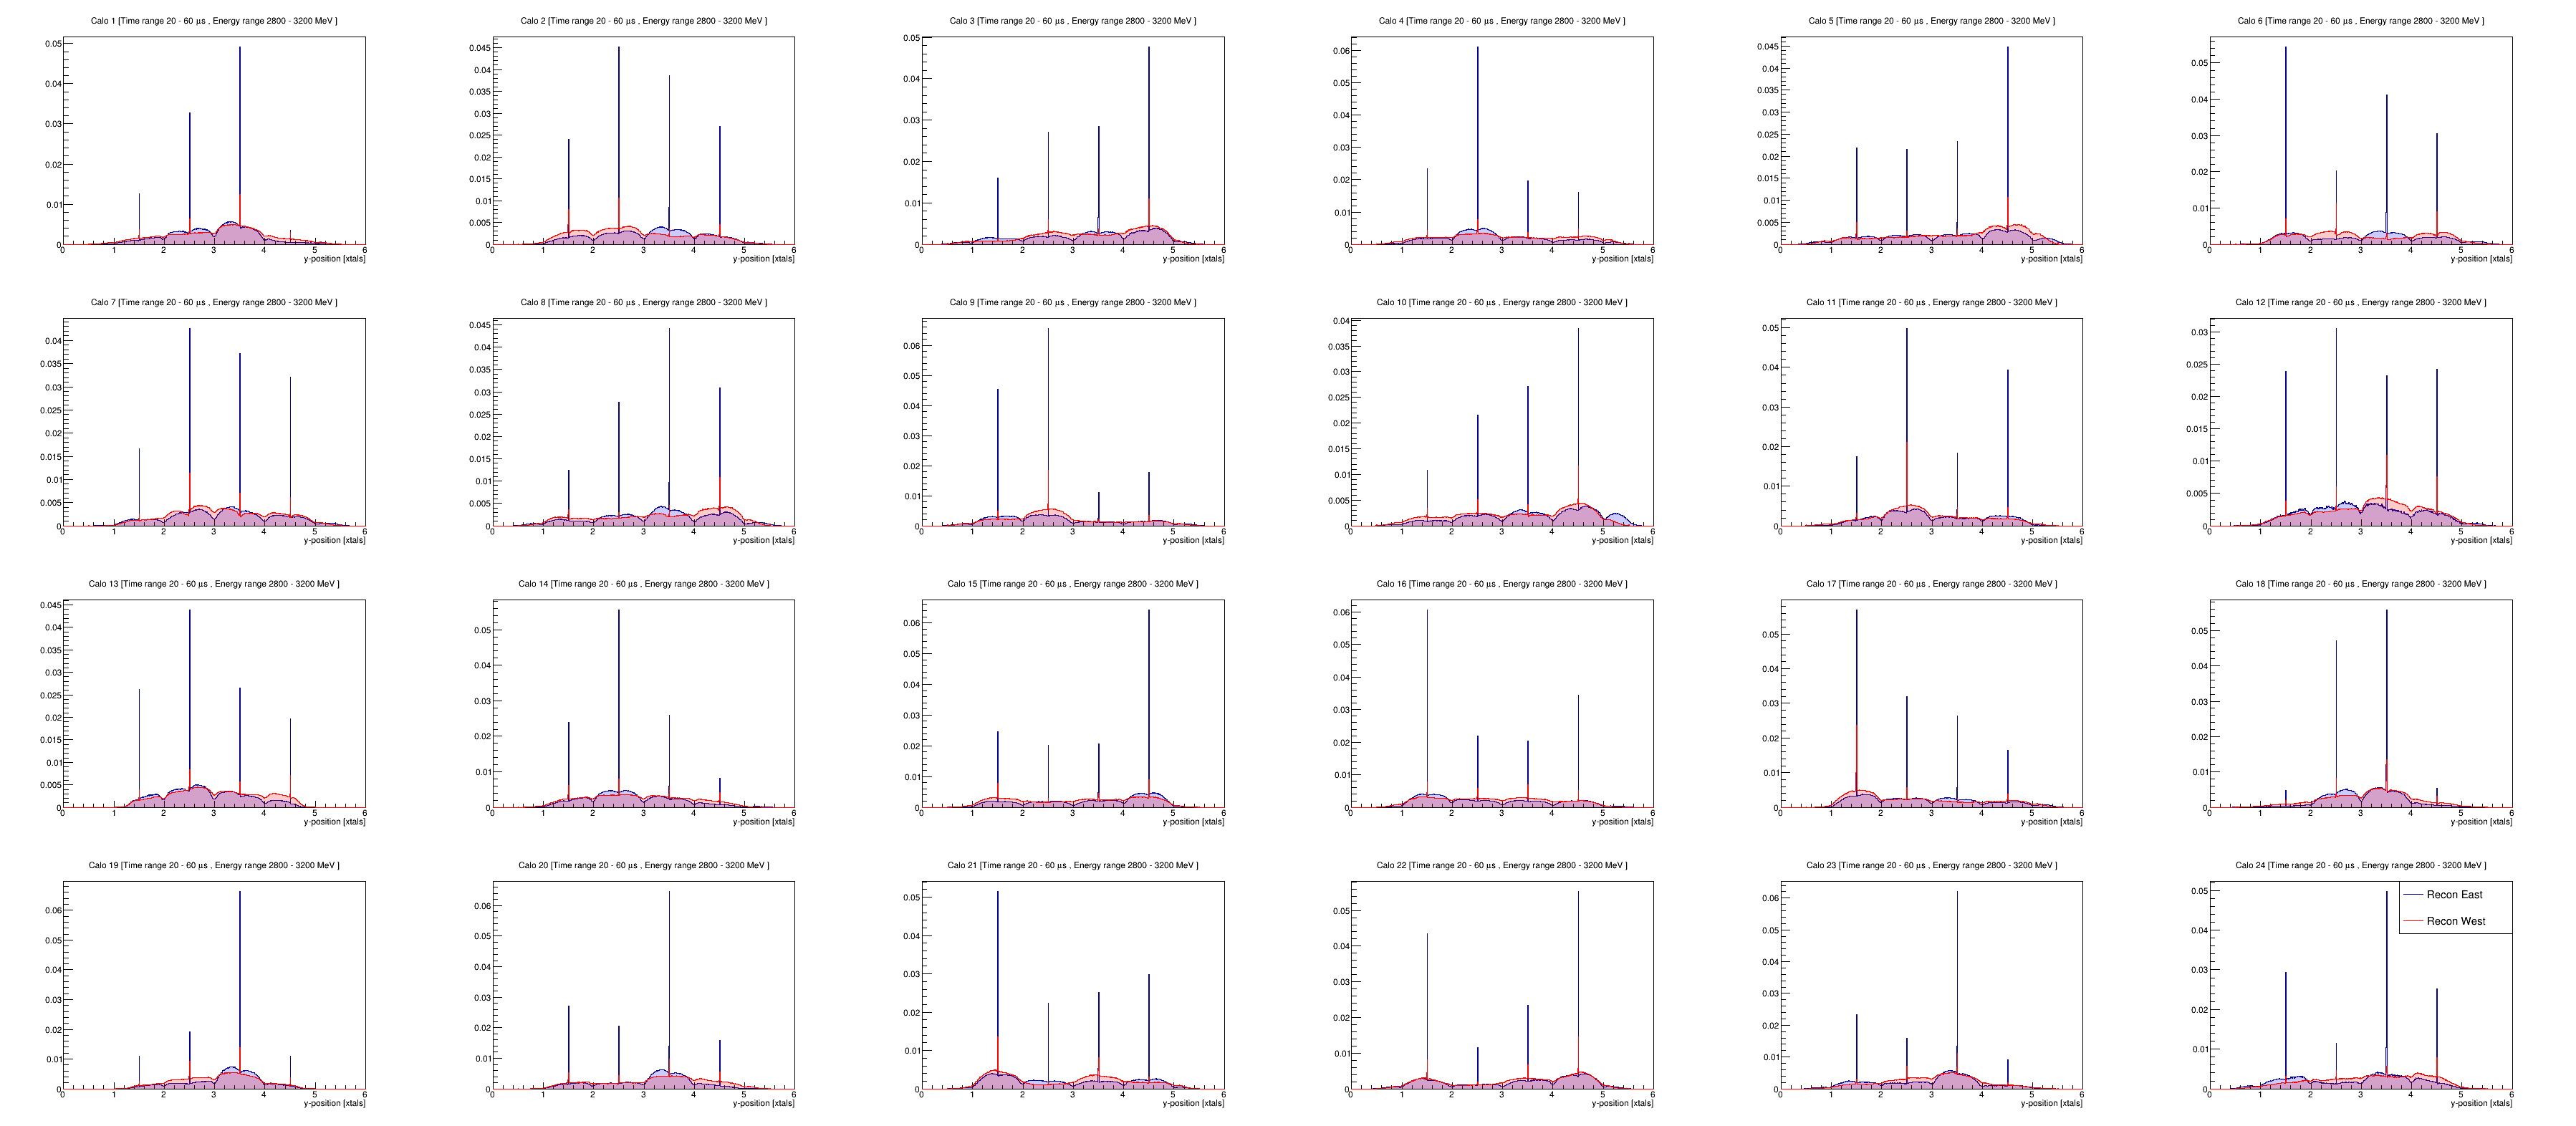

In [39]:
c = r.TCanvas("c","c",3600,1600)
c.Divide(6,4)
for calo in range(1,25):
    print("Starting calo", calo)
    f = r.TFile(eastFile)
    hy = f.Get("farline").Get("calo"+str(calo)).Get(yHistName).Clone("hy_"+str(calo))
    hy.GetXaxis().SetRangeUser(tLow,tHigh)
    hy.GetZaxis().SetRangeUser(eLow,eHigh)

    hy_y = hy.Project3D("y").Clone()
    hy_y.SetTitle(("Calo "+str(calo)+" [Time range "
                   +str(tLow)
                   +" - "+str(tHigh)+" #mus"
                   +" , Energy range "+str(eLow)+" - "+str(eHigh)+" MeV "
                   +"]"))
    hy_y.SetFillColorAlpha(4,0.2)
    
    fw = r.TFile(westFile)
    hyw = fw.Get("farline").Get("calo"+str(calo)).Get(yHistName).Clone("hy_"+str(calo))
    hyw.GetXaxis().SetRangeUser(tLow,tHigh)
    hyw.GetZaxis().SetRangeUser(eLow,eHigh)

    hyw_y = hyw.Project3D("y").Clone()
    hyw_y.SetLineColor(2)
    hyw_y.SetFillColorAlpha(2,0.2)
    
    c.cd(calo)
    
    if(True):
        hy_y.Scale(1/hy_y.Integral())
        hyw_y.Scale(1/hyw_y.Integral())
    
    hy_y.DrawCopy("hist")
    hyw_y.DrawCopy("hist same")
    #r.gPad.SetLogy()

c.Draw()

leg = r.TLegend(0.6,0.7,0.9,0.9)
leg.AddEntry(hy_y, "Recon East", "l")
leg.AddEntry(hyw_y, "Recon West", "l")
leg.Draw()

#c.Print("./images/TimeDependance_Calo"+str(calo).zfill(2)+".png")